In [142]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = 'imaging/2024-03-21/urea-3M-120min copy.tif'  
image = Image.open(image_path)
image_np = np.array(image)

In [143]:
# Convert to grayscale
gray = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Perform Hough Circle Transform
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=5, minDist=20,
                           param1=30, param2=30, minRadius=10, maxRadius=20)

dp（解析度的倒数）: 如果增加这个值，会减少检测到的圆圈的分辨率。通常设为1。

minDist（圆心之间的最小距离）: 如果检测到的圆圈太多重叠，可以尝试增加这个值。

param1（用于边缘检测的高阈值）: 如果圆圈的边界不是很明显，可以尝试降低这个值。

param2（Hough变换的阈值）: 这个值越小，能检测到的圆就越多。如果发现漏检圆圈，可以尝试降低这个值。

minRadius和maxRadius（圆半径的范围）: 如果预计的圆大小不准确，可以调整这两个参数。

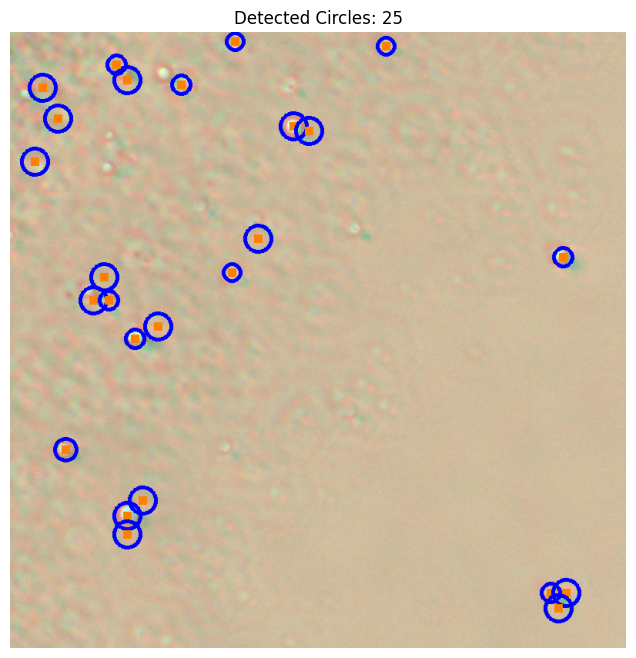

In [144]:
# Ensure at least some circles were found
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

# Create a copy of the original image to draw circles on
output = image_np.copy()

# Draw circles detected
if circles is not None:
    for (x, y, r) in circles:
        cv2.circle(output, (x, y), r, (255, 0, 0), 4)  # Draw the outer circle
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)  # Draw the center of the circle

# Show the output
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
plt.title(f'Detected Circles: {len(circles) if circles is not None else 0}')
plt.axis('off')
plt.show()